## Import dataset

In [1]:
import pandas as pd # We'll use pandas to open a .csv ad convert the rusulting dataframe in a list of lists
from matplotlib import pyplot as plt # to create charts
import seaborn as sns # to plot boxplots

directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'iris.csv'
df = pd.read_csv(f'{directory}/{file}')
dataset = df.values.tolist() # create a list of lists for our program

## EDA

In [2]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
count_classes = df['species'].value_counts() #it returns count of classes
print(count_classes)

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64


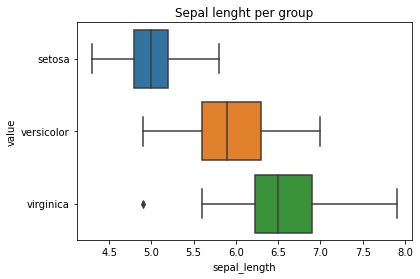

In [8]:
sepal_lenght_df = df.drop(columns = ['sepal_width', 'petal_length', 'petal_width']) 
#print(sepal_lenght_df)
mdf = pd.melt(sepal_lenght_df, id_vars=['sepal_length'], var_name=['species'])
ax = sns.boxplot(x="sepal_length", y="value", data=mdf)     #value
plt.title('Sepal lenght per group')
plt.show()

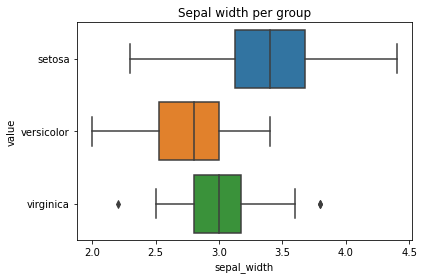

In [9]:
sepal_width_df = df.drop(columns = ['sepal_length', 'petal_length', 'petal_width'])   
mdf = pd.melt(sepal_width_df, id_vars=['sepal_width'], var_name=['species'])
ax = sns.boxplot(x="sepal_width", y="value", data=mdf)    
plt.title('Sepal width per group')
plt.show()

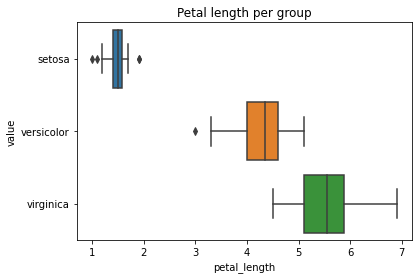

In [10]:
petal_length_df = df.drop(columns = ['sepal_length', 'sepal_width', 'petal_width'])   
mdf = pd.melt(petal_length_df, id_vars=['petal_length'], var_name=['species'])
ax = sns.boxplot(x="petal_length", y="value", data=mdf)    
plt.title('Petal length per group')
plt.show()

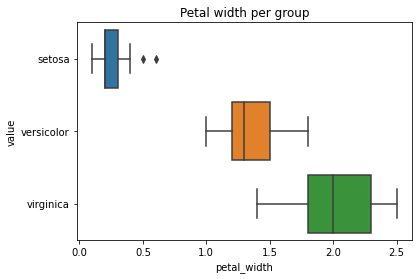

In [11]:
petal_width_df = df.drop(columns = ['sepal_length', 'sepal_width', 'petal_length'])   
mdf = pd.melt(petal_width_df, id_vars=['petal_width'], var_name=['species'])
ax = sns.boxplot(x="petal_width", y="value", data=mdf)    
plt.title('Petal width per group')
plt.show()

## Cross Validation

In [ ]:
import random

def cross_validation_split(ds, n_folds):
    '''It splits a dataset in k folds'''
    list_ds = [] # inizialize the empty list
    ds_copy = [ds]
    fold_size = int(len(ds) / n_folds)
    for i in range(n_folds):
        fold = [] # inizialize the empty list
        while len(fold) < fold_size:
            idx = randrange(len(ds_copy))
            fold.append(ds_copy.pop(idx))
            list_ds.append(fold)
    return list_ds

## Gini Index

In [ ]:
def gini_index(groups,classes):
    '''We use this function to calculate Gini index'''
    count_samples = float(sum([len(group) for group in groups])) # count all samples at split point
    gini = 0.0 # inizialize to 0.0
    for group in groups:
        size = float(len(group)) #get size
        if size == 0: # avoid divide by zero
            continue
        score = 0.0 #inizialize to 0.0
        for c in classes:
            p = [row[-1] for row in group].count(c) / size # calculate probability
        gini += (1.0 - score) * (size / count_samples) # formula to compute Gini Index
    return gini # return Gini Index

## Create splits

In [ ]:
def ds_split(idx, number, dataset):
    '''This function is able to split a dataset'''
    node_A = [] # initialize and empty list for left node
    node_B = [] # initialize and empty list for right node
    for record in dataset:
        if record[idx] < number:
            node_A.append(record) # this list contains values lower than number
        else:
            node_B.append(record) # this list contains value higher than or equal to number
    return node_A, node_B # return nodes

def best_split(dataset):
    '''This function is used to select best splits'''
    c = list(set(record[-1] for record in dataset))
    index, value, score, groups = 999999, 999999, 999999, None
    for idx in range(len(dataset[0])-1):
        for record in dataset:
            groups = ds_split(idx, record[idx], dataset)
            gini = gini_index(groups, c)
            print('X%d < %.3f Gini=%.3f' % ((idx+1), record[idx], gini))
            if gini < score:
                b_index, b_value, b_score, b_groups = idx, record[idx], gini, groups
    return {'index':index, 'value':value, 'groups':groups}

In [ ]:
best_split(dataset)